# 1. Codificación con RSA

Vamos a escribir funciones de codificación y decodificación usando el algoritmo RSA.

In [1]:
# Importamos nuestro módulo de funciones
from criptoMRG import *
# Importamos el módulo de cálculo simbólico sympy
from sympy import *

### 1.1. Implementación

El algoritmo RSA usará tres parámetros:

  1. $x$, entrada al algoritmo.
  2. $n$, módulo con el que trabajamos. 
  3. $e$, exponente, primo relativo con $\phi(n)$.

Y calculará $x^e \mod n$ para codificar.

In [4]:
def rsa(x,n,e):
    # Usaremos `pow`, que utiliza internamente un algoritmo de
    # exponenciación rápida.
    return pow(x,e,n)

### 1.2. Ejemplo de codificación

In [34]:
# Definimos dos primos para usarlos en RSA
p = prime(1550)
q = prime(2200)
n = p*q
p,q
n

252634961

In [6]:
# Y definimos un exponente, que debe ser primo relativo con phi(n).
e = 1871
phi = (p-1)*(q-1)
gcd(phi,e)

1

In [37]:
rsa(141852963,n,e)

94559265

### 1.3. Ejemplo de decodificación 

In [54]:
def rsaDecWithN(y,n,e):
    # Calculamos la función phi de Euler, y lo utilizamos para
    # calcular los coeficientes de Bezout.
    phi = totient(n)
    (u,v,c) = gcdex(e,phi)
    return pow(y,long(u)%phi,n)

In [59]:
# Nótese que para funcionar, el número a codificar debe ser menor
# que el n que estamos usando
rsaDecWithN(rsa(12341234,n,e),n,e)

12341234L

# 2. Vigenère

Implementamos la codificación de Vigenère. Para ello tomamos una matriz
e implementamos las funciones que la usan para codificar y decodificar consultando la posición de cada par de letras en filas y columnas.

In [4]:
# Matriz de codificación
matriz = [
    ['a','e','i','o','u'],
    ['e','i','o','u','a'],
    ['u','a','e','i','o'],
    ['i','o','u','a','e'],
    ['o','u','a','e','i'],
]

### 2.1. Codificación

In [11]:
from itertools import cycle

def vigenere(mensaje, matriz, clave):
    # Busca en la matriz la posición correspondiente al par de letras
    def codificaletra(pair):
        a,b = pair
        c = matriz[0].index(a)
        r = [fila[0] for fila in matriz].index(b)
        return matriz[r][c]
    
    # Codificamos cada letra emparejada con la clave
    cod = map(codificaletra, zip(mensaje,cycle(clave)))
    
    # La presentamos como una cadena en lugar de una lista
    return ''.join(cod) 

In [12]:
vigenere("aueioieu",matriz,"iei")

'iaouuuoa'

### 2.2. Decodificación

In [90]:
def vigenereDec(mensajecodificado, matriz, clave):
    def decodificaletra((c,b)):
        r = [fila[0] for fila in matriz].index(b)
        d = matriz[r].index(c)
        return matriz[0][d]
    
    # Decodificamos cada letra emparejada con la clave
    decod = map(decodificaletra, zip(mensajecodificado,cycle(clave)))
    
    # La presentamos como cadena en lugar de una lista
    return ''.join(decod)

In [91]:
vigenereDec("iaouuuoa",matriz,"iei")

'aueioieu'

# 3. Imágenes

In [68]:
# Usamos el módulo de tratamiento de imágenes PIL.
from PIL import Image
from numpy import array

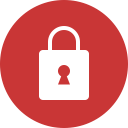

In [69]:
imag = Image.open('./lock.png')
imag

In [103]:
# Dada una imagen, la copia y modifica cada entrada de su matriz
# para obtener el negativo de la imagen.
def Negativo(imagen):
    imagenaux = imagen.copy()
    matrizaux = imagenaux.load()
    
    (n,m) = imagen.size
    for i in range(n):
        for j in range(m):
            (r,g,b,t) = matrizaux[i,j]
            matrizaux[i,j] = (-r % 256, -g % 256,-b % 256,t)
    
    return imagenaux

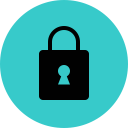

In [106]:
Negativo(imag)

In [110]:
Negativo(imag).save("lock_negative.png", "PNG")

# 4. Codificación Afín

In [111]:
def codAfin(imagen, b, c):
    imagenaux = imagen.copy()
    matrizaux = imagenaux.load()
    
    (n,m) = imagen.size()
    for i in range(n):
        for j in range(m):
            (r,g,b,t) = matrizaux[i,j]
            
            # codificación afín
            (rw,gw,bw) = b*v + c
            
            matrizaux[i,j] = (rw,gw,bw,t)